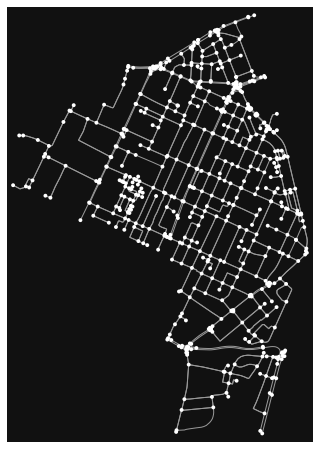

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [33]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

state = ox.graph_from_place('kristiine, tallinn, estonia')
G = ox.graph_from_place('kristiine, tallinn, estonia', network_type='drive')
ox.plot_graph(G)

In [34]:
# define origin and desination locations 
origin_point = (59.400019,24.7094212) 
destination_point = (59.4262092,24.7019518)
# get the nearest nodes to the locations 
origin_node = ox.get_nearest_node(G, origin_point) 
destination_node = ox.get_nearest_node(G, destination_point)
# printing the closest node id to origin and destination points 
origin_node, destination_node

(11791126, 5868334870)

In [35]:
points_list = list(G.edges())

In [36]:
G.number_of_nodes(),G.number_of_edges()

(574, 1325)

In [37]:
nodes_list= []
for point in points_list:
    v,u = point[0],point[1]
    nodes_list.append(v)
    nodes_list.append(u)

In [38]:
nodes_set = set(nodes_list)

In [41]:
nodes_dict = {}
reverse_nodes_dict = {}

for index,node in enumerate(nodes_set):
    reverse_nodes_dict[index] = node
    nodes_dict[node] = index

In [42]:
new_points_list = []
for point in points_list:
    v,u = point[0],point[1]
    newV, newU = nodes_dict[v],nodes_dict[u]
    new_node = (newV, newU)
    new_points_list.append(new_node)

In [43]:
nodes_dict[origin_node],nodes_dict[destination_node]

(290, 518)

In [44]:
new_points_list

[(195, 78),
 (195, 148),
 (218, 163),
 (218, 90),
 (218, 464),
 (350, 525),
 (358, 303),
 (358, 63),
 (358, 61),
 (378, 349),
 (378, 358),
 (79, 570),
 (79, 142),
 (82, 228),
 (90, 378),
 (90, 218),
 (94, 82),
 (94, 6),
 (99, 517),
 (99, 84),
 (117, 150),
 (117, 254),
 (157, 470),
 (157, 164),
 (211, 509),
 (211, 446),
 (211, 213),
 (213, 511),
 (213, 573),
 (216, 514),
 (216, 105),
 (216, 77),
 (220, 403),
 (220, 394),
 (220, 446),
 (237, 504),
 (237, 199),
 (237, 239),
 (239, 177),
 (239, 566),
 (241, 439),
 (241, 125),
 (241, 456),
 (43, 227),
 (294, 433),
 (294, 212),
 (294, 470),
 (297, 393),
 (297, 434),
 (297, 539),
 (352, 338),
 (380, 382),
 (382, 490),
 (382, 357),
 (382, 380),
 (385, 377),
 (385, 397),
 (394, 15),
 (394, 220),
 (396, 403),
 (396, 136),
 (396, 348),
 (397, 385),
 (397, 457),
 (397, 136),
 (403, 220),
 (403, 136),
 (281, 413),
 (281, 251),
 (282, 551),
 (282, 553),
 (284, 499),
 (284, 559),
 (288, 552),
 (288, 290),
 (290, 56),
 (290, 288),
 (290, 203),
 (440, 

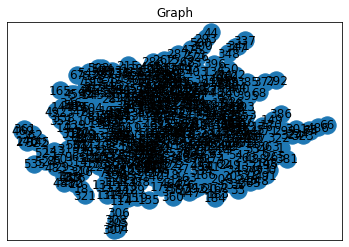

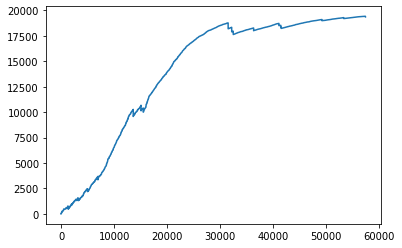

Best Route Based on Q Matrix:  [290, 288, 552, 284, 499, 89, 563, 3, 4, 474, 479, 206, 204, 217, 455, 219, 199, 237, 239, 177, 548, 429, 428, 141, 93, 36, 527, 528, 518]


In [45]:
G = nx.Graph()
G.add_edges_from(new_points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.title('Graph')
plt.show()

nodesNumber = G.number_of_nodes()         

R = np.matrix(np.ones(shape = (nodesNumber, nodesNumber)))
R *=-1
gamma = 0.8
initial_state = 1

def available_actions(state):
    startingNode_row = R[state, ]
    av_act = np.where(startingNode_row >= 0)[1]
    return av_act

def sample_next_action(available_act):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

def update(Q,startingNode, action, gamma):
	    
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action, max_index]
    
    Q[startingNode, action] = R[startingNode, action] + gamma *max_value
    
    if np.max(Q > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)


def shortest_Path(origin,destination):
		
	for point in new_points_list:
	    if point[1] ==destination:
	        R[point] = 150
	    else:
	        R[point] = 0
	        
	    if point[0] == destination:
	        R[point[::-1]] = 150
	    else:
	        R[point[::-1]] = 0


	R[destination, destination] = 150

	Q = np.matrix(np.zeros([nodesNumber, nodesNumber]))
	
	available_act = available_actions(initial_state)
	action = sample_next_action(available_act)
	update(Q,initial_state, action, gamma)
	

	scores=[]
	for i in  range(nodesNumber*100):
	    startingNode = np.random.randint(0, int(Q.shape[0]))
	    available_act = available_actions(startingNode)
	    action = sample_next_action(available_act)
	    score = update(Q,startingNode, action, gamma)
	    scores.append(score)

	steps = [origin]
	current = origin
	while current != destination:
	    next_step_index = np.where(Q[current,]== np.max(Q[current,]))[1]
	    
	    if next_step_index.shape[0] > 1:
	        next_step_index = int(np.random.choice(next_step_index, size = 1))
	    else:
	        next_step_index = int(next_step_index)
	    
	    steps.append(next_step_index)
	    current = next_step_index

	return scores, steps


scores,steps = shortest_Path(nodes_dict[origin_node],nodes_dict[destination_node])
plt.plot(scores)
plt.show()
print('Best Route Based on Q Matrix: ',steps) 

In [47]:
Q_route = [reverse_nodes_dict[r] for r in steps]

In [1]:
#Next step is Visualization, Many thanks to https://towardsdatascience.com/find-and-plot-your-optimal-path-using-plotly-and-networkx-in-python-17e75387b873